# Women in DC Comic Books

Predicting the Prominence of Female Heroes in the future

## Load Libraries

In [53]:
#Import Python Libraries
#import numpy as np
#import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from collections import Counter

## Import Data Sets

In [54]:
#Read csv file
dc = pd.read_csv("../data/dc-wikia-data.csv")

### Quick Look at the Data 

In [55]:
# Counts the total number characters by sex
dcHeroCount = dc['SEX'].value_counts()

print(dcHeroCount)

Male Characters           4783
Female Characters         1967
Genderless Characters       20
Transgender Characters       1
Name: SEX, dtype: int64


## Setting up New Data frames

In [56]:
# DataFrame with name, ID, Alignment, eye color, hair color, sex, alive status, appearances, and year
dcNew = pd.DataFrame(dc, columns = ['name' , 'ID', 'ALIGN' , 'EYE', 'HAIR', 'SEX', 'ALIVE', 
                                            'APPEARANCES', 'YEAR'])
dcNew.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,1939.0
1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,1938.0
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,1940.0
3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,1939.0
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,1940.0


### New DC Data Frame for Female Characters sorted by Year

In [57]:
# Get a dataframe with only female heroes indexes  
dcFemaleHeroes = dcNew[dcNew['SEX'] ==  'Female Characters']
dcFemaleHeroes.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR
5,Wonder Woman (Diana Prince),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,1231.0,1941.0
8,Dinah Laurel Lance (New Earth),Public Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1075.0,1969.0
10,GenderTest,Secret Identity,Good Characters,Blue Eyes,Blond Hair,Female Characters,Living Characters,1028.0,1956.0
12,Barbara Gordon (New Earth),Secret Identity,Good Characters,Blue Eyes,Red Hair,Female Characters,Living Characters,951.0,1967.0
14,Lois Lane (New Earth),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,934.0,1938.0


In [58]:
# Drop rows that do not have a Year present
dcFemaleHeroes.dropna(subset = ['YEAR'], inplace=True) 
# Now the data frame dcMaleHeroes only have male characters with a year value present

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [59]:
# Sort the rows of dcMaleHeroes by column 'Year'
dcFemaleHeroes = dcFemaleHeroes.sort_values(by ='YEAR' )
print("Contents of Sorted Dataframe based on a single column 'Year' : ")
dcFemaleHeroes.head()

Contents of Sorted Dataframe based on a single column 'Year' : 


,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR
1936,Lady of the Lake (New Earth),NaN,Good Characters,Blue Eyes,Blue Hair,Female Characters,Living Characters,13.0,1936.0
1708,Guinevere (New Earth),Public Identity,Good Characters,NaN,Blond Hair,Female Characters,Living Characters,15.0,1936.0
2229,Rose Psychic (New Earth),Public Identity,Good Characters,Black Eyes,Black Hair,Female Characters,Deceased Characters,11.0,1937.0
14,Lois Lane (New Earth),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,Living Characters,934.0,1938.0
384,Abigail Hunkel (New Earth),Secret Identity,Good Characters,Black Eyes,Brown Hair,Female Characters,Living Characters,79.0,1939.0


### New DC Data Frame for Male Characters sorted by Year 

In [60]:
# Get a dataframe with only male charcters indexes  
dcMaleHeroes = dcNew[dcNew['SEX'] ==  'Male Characters']
dcMaleHeroes.head()

,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR
0,Batman (Bruce Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,3093.0,1939.0
1,Superman (Clark Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,2496.0,1938.0
2,Green Lantern (Hal Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,Living Characters,1565.0,1940.0
3,James Gordon (New Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,Living Characters,1316.0,1939.0
4,Richard Grayson (New Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,Living Characters,1237.0,1940.0


In [61]:
# Drop rows that do not have a Year present
dcMaleHeroes.dropna(subset = ['YEAR'], inplace=True) 
# Now the data frame dcMaleHeroes only have male characters with a year value present

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [62]:
# Sort the rows of dcMaleHeroes by column 'Year'
dcMaleHeroes = dcMaleHeroes.sort_values(by ='YEAR' )
print("Contents of Sorted Dataframe based on a single column 'Year' : ")
dcMaleHeroes.head()

Contents of Sorted Dataframe based on a single column 'Year' : 


,name,ID,ALIGN,EYE,HAIR,SEX,ALIVE,APPEARANCES,YEAR
231,Richard Occult (New Earth),Secret Identity,NaN,Grey Eyes,Black Hair,Male Characters,Living Characters,125.0,1935.0
6886,Bedivere (New Earth),NaN,NaN,NaN,NaN,Male Characters,Living Characters,NaN,1936.0
6531,Gareth (New Earth),NaN,NaN,NaN,NaN,Male Characters,Living Characters,1.0,1936.0
2840,Gawain (New Earth),Public Identity,Good Characters,NaN,NaN,Male Characters,Living Characters,8.0,1936.0
321,Merlin (New Earth),Secret Identity,Neutral Characters,Black Eyes,White Hair,Male Characters,Living Characters,92.0,1936.0


## Comparing the Data Between Male and Female DC Characters

In [63]:
# Stating the number of male and female characters in dc
numberOfFemaleCharacters = len(dcFemaleHeroes)
numberOfMaleCharacters = len(dcMaleHeroes)
totalDC = numberOfFemaleCharacters + numberOfMaleCharacters

print('Total Number of Characters:', str(totalDC))
print('Number of Male Characters: ', str(numberOfMaleCharacters))
print('Number of Female Characters: ', str(numberOfFemaleCharacters))

Total Number of Characters: 6682
Number of Male Characters:  4735
Number of Female Characters:  1947


In [64]:
# get the average appearences of male heroes per year 
avgMaleApp = dcMaleHeroes['APPEARANCES'].mean()
print('The average appearence of a Male Character: ', str(avgMaleApp))

# get the average appearences of female heroes per year 
avgFemaleApp = dcFemaleHeroes['APPEARANCES'].mean()
print('The average appearence of a Female Character: ', str(avgFemaleApp))

The average appearence of a Male Character:  24.649654557610877
The average appearence of a Female Character:  22.66469639978506


In [65]:
# get the standard deviation appearences of male heroes 
stdMaleApp = dcMaleHeroes['APPEARANCES'].std()
print('The standard deviation appearence of a Male Character: ', str(stdMaleApp))

# get the standard deviation appearences of female heroes 
stdFemaleApp = dcFemaleHeroes['APPEARANCES'].std()
print('The standard deviation appearence of a Female Character: ', str(stdFemaleApp))

The standard deviation appearence of a Male Character:  95.57103323412639
The standard deviation appearence of a Female Character:  69.04315609474521


In [66]:
# count apperances per year
maleHeroYearlyCount = dcMaleHeroes['YEAR'].value_counts()
maleCountYearly = maleHeroYearlyCount.sort_index()

# count apperances per year
femaleHeroYearlyCount = dcFemaleHeroes['YEAR'].value_counts()
femaleCountYearly = femaleHeroYearlyCount.sort_index()

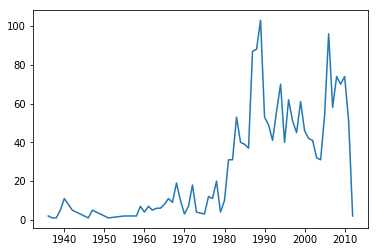

In [67]:
# Female: graphing tha amount of male vs female characters introducted per year
femaleCountYearly.plot(x ='Year', y='femaleCountYearly', kind = 'line')

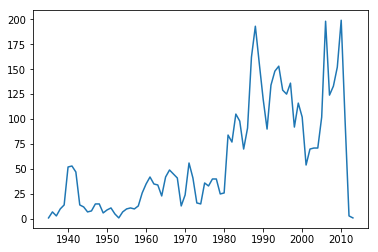

In [68]:
# Male: graphing tha amount of male vs female characters introducted per year
maleCountYearly.plot(x ='Year', y='maleCountYearly', kind = 'line')

Text(0, 0.5, 'Number of Characters Introduced')

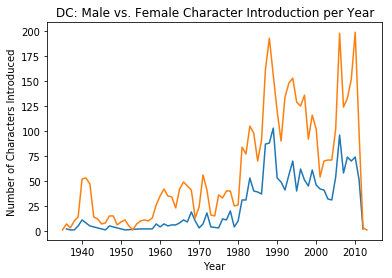

In [69]:
# Overlaying the Male vs Female introductions per year
ax = femaleCountYearly.plot(x ='Year', y='femaleCountYearly', kind = 'line', 
                            title='DC: Male vs. Female Character Introduction per Year')
maleCountYearly.plot(ax=ax)

# Set the x-axis label
ax.set_xlabel("Year")

# Set the y-axis label
ax.set_ylabel("Number of Characters Introduced")

In [70]:
ladies = Counter(dcFemaleHeroes['YEAR'])
ladyIntros = pd.DataFrame.from_dict(ladies, orient='index').reset_index()
ladyIntros = ladyIntros.rename(columns={'index':'Year', 0:'Newly Introduced'})
ladyIntros.head()

,Year,Newly Introduced
0,1936.0,2
1,1937.0,1
2,1938.0,1
3,1939.0,5
4,1940.0,11


Text(0.5, 1.0, 'Worldwide over Time')

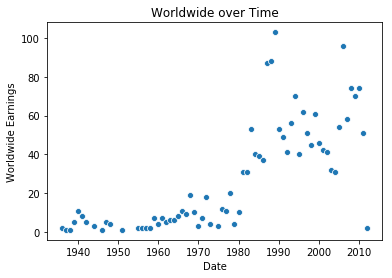

In [71]:
# make a scatter plot
sns.scatterplot(x = ladyIntros['Year'],
                y = ladyIntros['Newly Introduced'],
               legend = False)
plt.xlabel('Date')
plt.ylabel('Worldwide Earnings')
plt.title('Worldwide over Time')

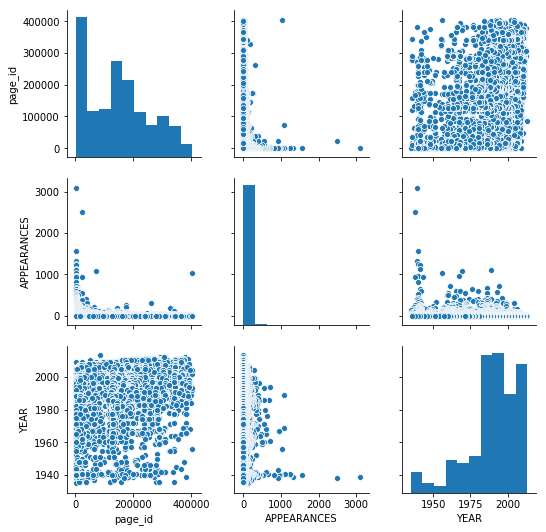

In [72]:
sns.pairplot(dc)